In [1]:
# https://www.frankcleary.com/svd/

In [3]:
import pandas as pd

In [4]:
c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
post_words = pd.DataFrame([[4, 4, 6, 2],
                           [6, 1, 0, 5],
                           [3, 0, 0, 5],
                           [0, 6, 5, 1],
                           [0, 4, 5, 0]],
                          index = words,
                          columns = c_names)
post_words.index.names = ['word:']
post_words

,post1,post2,post3,post4
word:,,,,
ice,4,4,6,2
snow,6,1,0,5
tahoe,3,0,0,5
goal,0,6,5,1
puck,0,4,5,0


In [7]:
import numpy as np

U, sigma, V = np.linalg.svd(post_words)
print('V = ')
print(np.round(V, decimals=2))

V = 
[[-0.4  -0.57 -0.63 -0.35]
 [-0.6   0.33  0.41 -0.6 ]
 [ 0.6  -0.41  0.32 -0.61]
 [-0.34 -0.63  0.58  0.39]]


In [9]:
print('U = ', U)
print('sigma = ', sigma)

U =  [[-0.62610079  0.01852561  0.6259093   0.23487748 -0.40090488]
 [-0.35134826 -0.67829097  0.0779915  -0.56006159  0.311005  ]
 [-0.21940528 -0.51980146 -0.50346468  0.6484906  -0.08747016]
 [-0.51965373  0.37026259 -0.59046979 -0.38005352 -0.31586445]
 [-0.40788911  0.36371724 -0.00485878  0.25726028  0.79695031]]
sigma =  [13.3221948   9.2609512   2.41918664  1.37892883]


In [11]:
V_df = pd.DataFrame(V, columns=c_names)
V_df

,post1,post2,post3,post4
0,-0.395634,-0.570869,-0.630100,-0.347212
1,-0.599836,0.331743,0.408279,-0.602870
2,0.604001,-0.405353,0.321932,-0.605996
3,-0.344752,-0.632253,0.576751,0.385695


In [28]:
np.matmul(np.matmul(U[:, :2], np.diag(sigma[:2])), V[:2, :])

array([[ 3.19708412,  4.81855605,  5.32573599,  2.79267497],
       [ 5.61979298,  0.58820097,  0.38467542,  5.41220366],
       [ 4.04394318,  0.07166455, -0.12363886,  3.91701473],
       [ 0.68211703,  5.08962774,  5.76212157,  0.33649133],
       [ 0.12939801,  4.21952303,  4.79918534, -0.14394602]])

In [44]:
np.matrix(U[:, :2])

matrix([[-0.62610079,  0.01852561],
        [-0.35134826, -0.67829097],
        [-0.21940528, -0.51980146],
        [-0.51965373,  0.37026259],
        [-0.40788911,  0.36371724]])

In [42]:
np.diag(sigma[:2])

array([[13.3221948,  0.       ],
       [ 0.       ,  9.2609512]])

In [45]:
np.matrix(V[:2, :])

matrix([[-0.39563365, -0.57086917, -0.6301003 , -0.34721178],
        [-0.59983555,  0.33174302,  0.4082791 , -0.60286986]])

In [46]:
np.matrix(U[:, :2]) * np.matrix(V[:2, :])

matrix([[ 0.23659422,  0.36356738,  0.40206991,  0.20622104],
        [ 0.54586823, -0.02444441, -0.05554738,  0.53091343],
        [ 0.3985995 , -0.0471888 , -0.07397674,  0.38955273],
        [-0.01650416,  0.41948633,  0.47860445, -0.04279025],
        [-0.05679587,  0.35351197,  0.40550919, -0.07765025]])

In [17]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])

print("A calculated using only the first two components:\n")
print(pd.DataFrame(A_approx, index=words, columns=c_names))
print("\nError from actual value:\n")
print(post_words - A_approx)

A calculated using only the first two components:

          post1     post2     post3     post4
ice    3.197084  4.818556  5.325736  2.792675
snow   5.619793  0.588201  0.384675  5.412204
tahoe  4.043943  0.071665 -0.123639  3.917015
goal   0.682117  5.089628  5.762122  0.336491
puck   0.129398  4.219523  4.799185 -0.143946

Error from actual value:

          post1     post2     post3     post4
word:                                        
ice    0.802916 -0.818556  0.674264 -0.792675
snow   0.380207  0.411799 -0.384675 -0.412204
tahoe -1.043943 -0.071665  0.123639  1.082985
goal  -0.682117  0.910372 -0.762122  0.663509
puck  -0.129398 -0.219523  0.200815  0.143946


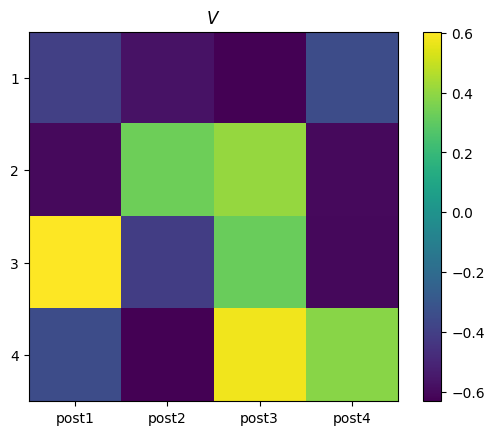

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(V, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.colorbar();

In [48]:
pd.DataFrame(U[:,1], index=words)

,0
ice,0.018526
snow,-0.678291
tahoe,-0.519801
goal,0.370263
puck,0.363717


# Identifying similar research papers using SVD

In [49]:
! mkdir -p research_papers

In [51]:
! wget --user-agent='Mozilla/5.0 (Macintosh; Intel Mac OS X 10.8; rv:21.0) Gecko/20100101 Firefox/21.0' -O research_papers/clpx1.pdf 'https://www.cell.com/action/showPdf?pii=S0092-8674%2811%2900429-6'

--2024-12-31 12:52:15--  https://www.cell.com/action/showPdf?pii=S0092-8674%2811%2900429-6
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.cell.com (www.cell.com)... 172.66.0.112, 162.159.140.114
connected. to www.cell.com (www.cell.com)|172.66.0.112|:443... 
HTTP request sent, awaiting response... 403 Forbidden
2024-12-31 12:52:15 ERROR 403: Forbidden.

